# Análisis Exploratorio y Curación de Datos

**Todo ejercicio debe tener un análisis fundamentado en la teoría vista en la materia, dicho análisis sera parte del informe a entregar en pdf**

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes necesarios 

In [1]:
# LIBRERÍAS
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# LIBRERÍAS ESPECIFICAS DE ASTRONOMÍA
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units
from astropy import units as u
from astroquery.skyview import SkyView

# LIBRERÍA PARA ANALIZAR DATOS FALTANTES
import missingno as msno

import seaborn
seaborn.set_context('talk')

from utils import *

# AEyC

### Cargar el conjunto de datos 'galaxias1.csv' como un DataFrame, el mismo tiene las propiedades físicas de las galaxias.

- Definir el id como index del DataFrame
- Mostrar el tipo de dato de cada columna 
- Observar si hay filas e indices duplicados, en caso de encontrar valores duplicados decida si los mismos deben ser eliminados, justifique por qué.
- Realicen algunas exploraciones más sobre el dataset
- Remplaze los valores faltantes/NaN/carentes de sentido físico con **KNNImputer**
- Elimine los *outliers* de cada Feature (ver defición de valores atípicos o *outliers* en boxplot.pdf), indique el porcentaje de valores que se están eliminando
- Genere un nuevo DataFramen (df1). 

### Carga y lectura de archivo galaxias_1.csv

In [2]:
data_original = pd.read_csv('galaxias_1.csv', sep=',')

In [3]:
data_original.sample(10,random_state=123)

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
19572,"1,23765760749765E+018",123.805910,36.776563,19.08556,17.54430,16.84741,16.37789,15.99599,14.431050,0.042094,-2.238153,0,1,0
47594,"1,23766230727184E+018",236.671434,30.351393,17.46831,15.71435,14.97788,14.63240,14.36831,8.411476,0.031949,-2.490435,0,0,1
55860,"1,23766410470287E+018",145.460739,10.748317,18.29736,16.44632,15.57925,15169.00000,14.84991,6.944691,0.048422,-2.718111,1,0,0
59474,"1,23767193604129E+018",254.650370,40.699307,19.25356,17.93743,17.56856,17.32045,17.48283,10.043970,0.029990,-1.685001,0,0,1
85848,"1,23765549597865E+018",201.394331,-1.553074,18.78843,17.29002,16.83778,16.53923,16.35315,10.911070,0.044366,-1.950645,0,0,1
74158,"1,23765933031568E+018",247.710673,38.763312,17.68026,16.85565,16.58565,16.41258,16.29905,8.365392,0.032376,-1.094606,0,0,1
76077,"1,23766185147479E+018",202.183564,43.930695,16.49429,16.11075,16.33185,16.39906,16.42290,4.055253,0.027969,-0.162436,0,0,1
23690,"1,23766230727544E+018",244.334041,25.657786,19.55392,18.20434,17.66943,17.42545,17.24907,10.020170,0.048300,-1.884485,0,0,1
48367,"1,23766230244629E+018",244.040661,34.165787,18.49640,17.20975,16.81768,16.56079,16.46296,8.123385,0.037806,-1.678722,0,0,1
86474,"1,23764872121811E+018",151.220749,-0.058335,17.58110,16.14195,15.44801,15.06701,14.78960,18.357700,0.021477,-2.133091,0,1,0


In [4]:
data_original[data_original.duplicated()].sort_values(['dec'])

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
27154,"1,2376602397775E+018",51.560433,-0.687173,18.40323,17.33583,16.96393,16.76737,16.63186,10.294210,0.021650,-1.439301,0,1,0
70897,"1,2376570700894E+018",36.596322,-0.491854,18.82296,17.77973,17.47922,17.17294,17.02636,8.950567,0.021148,-1.343746,0,0,1
42390,"1,23765173738229E+018",213.595792,2.978021,17.07984,15.18035,14.26774,13.82781,13.50114,23.141960,0.026165,-2.812099,0,0,1
46077,"1,23766224659579E+018",209.583963,7.225087,16.07774,14.77386,14.13092,13.78163,13.47233,24.426840,0.024556,-1.946819,0,1,0
73582,"1,23766195135015E+018",235.731238,9.228520,18.11033,16.22853,15.27528,14.73241,14.31919,20.973250,0.034623,-2.835043,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77030,"1,23766135700796E+018",186.371858,47.273205,16.05042,14.34547,13.53434,13.15750,12.84926,23.705170,0.024868,-2.516076,0,1,0
87068,"1,23766143484671E+018",189.890009,47.623285,15.83679,14.45774,13.80969,13.44220,13.18542,23.371910,0.024251,-2.027100,0,1,0
11357,"1,23766143538437E+018",192.665965,47.933419,18.05920,15.64427,14.63559,14.08723,13.76011,13.652620,0.029494,-3.423610,0,1,0
90046,"1,23765534781217E+018",220.906458,56.772679,18.49025,16.62319,15.77129,15.35340,15.02012,7.065283,0.042816,-2.718963,0,0,1


In [5]:
data_original[data_original.duplicated(subset=['objID'])].sort_values(['objID'])

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
66786,"1,23764594397649E+018",50.827067,0.939875,18.73190,17.42271,16.80514,16.47006,16.18039,4.835532,0.036489,-1.926760,0,0,1
66787,"1,23764594397649E+018",50.827067,0.939875,18.73190,17.42271,16.80514,16.47006,16.18039,4.835532,0.036678,-1.926760,0,0,1
26722,"1,23764594397741E+018",52.935881,1.047554,18.82419,17.60955,17.07287,16.79243,16.64695,8.152502,0.031016,-1.751318,0,0,1
25502,"1,23764594397833E+018",55.053168,0.885874,18.97668,17.53440,17.04177,16.80851,16.66080,13.054510,0.038794,-1.934912,0,1,0
90834,"1,23764594397839E+018",55.123625,0.872487,18.28252,16.52093,15.60923,15.08733,14.62764,18.851100,0.040696,-2.673291,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52705,"1,23768024090634E+018",343.304171,-8.196775,17.33667,16.14818,15.62663,15.34346,15.02331,9.619887,0.027473,-1.710036,0,1,0
60607,"1,23768024091132E+018",354.835710,-8.619133,17.36271,16.13077,15.52814,15.21014,14.93630,11.476360,0.034090,-1.834565,1,0,0
30215,"1,23768024092351E+018",22.998652,-8.275140,19.65293,17.09929,16.17692,15.70902,15.34659,9.233762,0.040648,-3.476006,0,1,0
14518,"1,23768024143423E+018",322.765171,-6.232822,19.10234,17.69802,17.36507,17.23353,17.14699,6.579560,0.024794,-1.737274,0,0,1


In [6]:
print('El DataFrame cuenta con',format(data_original.count()[0]),'observaciones')

El DataFrame cuenta con 92102 observaciones


In [7]:
print('El DataFrame cuenta con',format(len(data_original.columns)),'columnas')

El DataFrame cuenta con 14 columnas


Podemos decir que el dataframe cuenta con 92102 observaciones de galaxias, con información distribuida en 14 columnas.

### Definir el id como index del DataFrame

In [8]:
data_original[data_original.duplicated(subset=['objID'], keep='first')].shape[0]

34421

In [9]:
data_original['objID'].describe()

count                     92102
unique                    57681
top       1,23766630055458E+018
freq                         61
Name: objID, dtype: object

In [10]:
new_data = data_original[~data_original.duplicated(keep='first')]

Se pueden observar 34421 objID repetidos, suponemos que deben pertenecer a observaciones de galaxias identificadas de con el mismo objID. Se encuentran 61 filas que se repiten con todos sus datos. Se propone eliminar estas filas repetidas.

In [11]:
data = new_data.copy()

In [12]:
data.set_index('objID', inplace=True)
data

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
objID,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1
"1,23765153764514E+018",219.313588,62.338577,18.77944,17.71890,17.35237,17.14414,17.04369,4.985637,0.036884,-1.427076,0,0,1
"1,237655744025E+018",239.043213,4.601942,18.93000,17.34099,16.79838,16.53403,16.52089,13.324690,0.034145,-2.131620,0,1,0


In [13]:
# Se deciden borrar las filas con indice repetido
# asumiendo que se tratan de observaciones distintas de la misma galaxia
data = data[~data.index.duplicated(keep='first')]
data

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
objID,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0
"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1


### Mostrar el tipo de dato de cada columna

In [14]:
data.dtypes

ra            float64
dec           float64
modelMag_u    float64
modelMag_g    float64
modelMag_r    float64
modelMag_i    float64
modelMag_z    float64
petroR90_r    float64
z             float64
Color         float64
elliptical      int64
spiral          int64
uncertain       int64
dtype: object

Los tipos de datos parecieran ser correctos

### Observar si hay filas e indices duplicados, en caso de encontrar valores duplicados decida si los mismos deben ser eliminados, justifique por qué.

In [15]:
total_rows = data.shape[0]
print(f'Cantidad total de filas: {total_rows}')
index_unique = data.index.nunique()
print(f'Cantidad de index únicos: {index_unique}')
diff = total_rows - index_unique
print(f'Difernecia de entre total y únicos: {diff}')

Cantidad total de filas: 57681
Cantidad de index únicos: 57681
Difernecia de entre total y únicos: 0


In [16]:
duplicated = data.duplicated(keep='first')
# utilizo la función any para detectar si hay algún elemento true en la variable duplicated
# duplicated true => existen elementos duplicados
if duplicated.any():
    print('Hay valores duplicados')
else:
    print('No hay valores duplicados')

No hay valores duplicados


Se elimina el único valor repetido en el index

### Realicen algunas exploraciones más sobre el dataset

Observación de estadísticos de las variables del dataframe. Todas las variables cuentan con la misma cantidad de datos. Existen mínimos para analizar en las variables modelMag_u, modelMag_g, modelMag_z. No se visualizan datos máximos que permitan inferir algún outlier.

No existen datos faltantes, consideramos que no es necesario eliminar ninguna columna por el momento.

Las variables spiral y uncertain tienen mayor dispersión que la variable elliptical.

In [17]:
data.describe()

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
count,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000
mean,183.419958,25.380842,183.765182,172.718436,162.646477,170.157392,136.560776,54.057630,0.035991,-3.416101,0.074409,0.344481,0.581110
std,57.659031,18.616160,1734.388143,1622.623065,1540.039554,1568.942667,1383.827414,882.310694,0.008498,72.031187,0.262438,0.475203,0.493382
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.902330,11.459980,-9999.000000,0.842248,0.020001,-2859.000000,0.000000,0.000000,0.000000
25%,151.447181,10.476006,17.752040,16.314860,15.647160,15.287560,15.006410,6.132339,0.028957,-2.431772,0.000000,0.000000,0.000000
50%,183.931359,23.898519,18.447040,17.119080,16.555560,16.247150,16.020130,8.386065,0.036099,-1.898378,0.000000,0.000000,1.000000
75%,221.634978,39.408083,19.011310,17.738920,17.255280,16.983440,16.798670,11.335120,0.043573,-1.570280,0.000000,1.000000,1.000000
max,359.965567,70.133213,25756.000000,20542.000000,19138.000000,23871.000000,20767.000000,78255.000000,0.050000,10015.860000,1.000000,1.000000,1.000000


Creación de columna tipo_galaxia según corresponda

In [18]:
data.loc[data.elliptical == 1, 'tipo_galaxia'] = "elliptical"
data.loc[data.spiral == 1, 'tipo_galaxia'] = "spiral"
data.loc[data.uncertain == 1, 'tipo_galaxia'] = "uncertain"

/home/exequiel/anaconda3/envs/Diplomatura2021/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/exequiel/anaconda3/envs/Diplomatura2021/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/exequiel/anaconda3/envs/Diplomatura2021/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 

In [19]:
data.tipo_galaxia.count()

57681

<AxesSubplot:xlabel='tipo_galaxia', ylabel='count'>

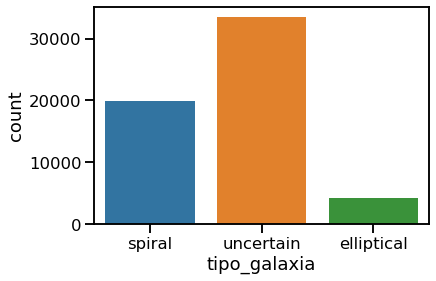

In [20]:
seaborn.countplot(x=data.tipo_galaxia)

Se observa que las galaxias de tipo uncertain tienen mas outliers

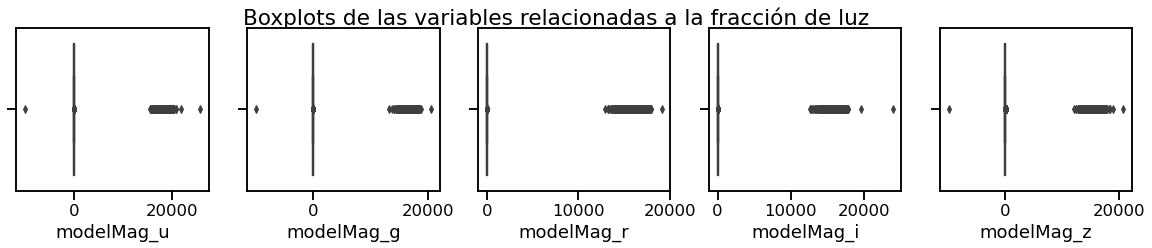

In [21]:
fig, ax = plt.subplots(ncols=5, figsize=(20,3))
seaborn.boxplot(x=data['modelMag_u'], ax=ax[0])
seaborn.boxplot(x=data['modelMag_g'], ax=ax[1])
seaborn.boxplot(x=data['modelMag_r'], ax=ax[2])
seaborn.boxplot(x=data['modelMag_i'], ax=ax[3])
seaborn.boxplot(x=data['modelMag_z'], ax=ax[4])
plt.suptitle("Boxplots de las variables relacionadas a la fracción de luz")
plt.show()

Se observan outliers en las variables modelMag_u, modelMag_g y modelMag_z

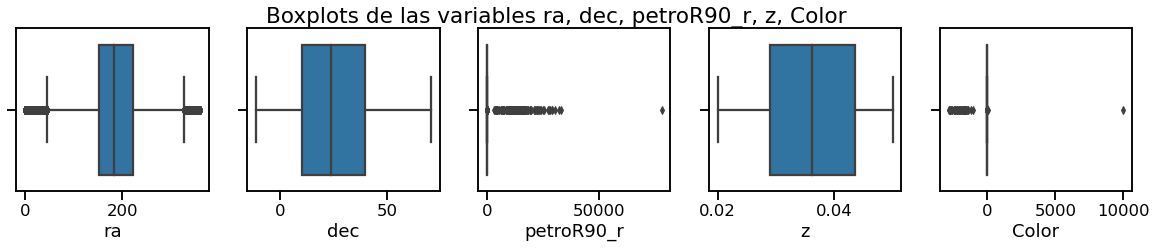

In [22]:
fig, ax = plt.subplots(ncols=5, figsize=(20,3))
seaborn.boxplot(x=data['ra'], ax=ax[0])
seaborn.boxplot(x=data['dec'], ax=ax[1])
seaborn.boxplot(x=data['petroR90_r'], ax=ax[2])
seaborn.boxplot(x=data['z'], ax=ax[3])
seaborn.boxplot(x=data['Color'], ax=ax[4])
plt.suptitle("Boxplots de las variables ra, dec, petroR90_r, z, Color")
plt.show()

La variable ra, dec y z se observan con una distribución normalizada.

La variable petroR90_r no se conoce esta variable, cuenta con outliers.

La variable Color presenta outliers.

In [23]:
count_ellpitical = data[data.tipo_galaxia == 'elliptical'].shape[0]
count_spiral = data[data.tipo_galaxia == 'spiral'].shape[0]
count_uncertain = data[data.tipo_galaxia == 'uncertain'].shape[0]
print(f'Cantidad de galaxias elliptical: {count_ellpitical}')
print(f'Cantidad de galaxias spiral: {count_spiral}')
print(f'Cantidad de galaxias uncertain: {count_uncertain}')

Cantidad de galaxias elliptical: 4292
Cantidad de galaxias spiral: 19870
Cantidad de galaxias uncertain: 33519


In [24]:
data.drop(['tipo_galaxia'], axis=1)

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
objID,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0
"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1


### Remplaze los valores faltantes/NaN/carentes de sentido físico con KNNImputer

Analizo variable ra, los valores no pueden ser menores a 0 o mayores a 360

In [25]:
print("Cantidad ra menores a 0: ",data[data.ra < 0].ra.count())
print("Cantidad ra mayores a 360: ",data[data.ra > 360].ra.count())

Cantidad ra menores a 0:  0
Cantidad ra mayores a 360:  0


Analizo variable dec, los valores no pueden ser menores a -90 o mayores a 90

In [26]:
print("Cantidad dec menores a -90: ",data[data.dec < -90].ra.count())
print("Cantidad dec mayores a 90: ",data[data.dec > 90].ra.count())

Cantidad dec menores a -90:  0
Cantidad dec mayores a 90:  0


In [27]:
data['petroR90_r'].describe()

count    57681.000000
mean        54.057630
std        882.310694
min          0.842248
25%          6.132339
50%          8.386065
75%         11.335120
max      78255.000000
Name: petroR90_r, dtype: float64

Estadísticos de la variable petroR90_r mayores a la media

In [28]:
data[data.petroR90_r > data.petroR90_r.mean()].petroR90_r.describe()

count      208.000000
mean     12414.338905
std       7927.348309
min         54.828680
25%      10079.500000
50%      11511.000000
75%      14692.250000
max      78255.000000
Name: petroR90_r, dtype: float64

In [29]:
data[data.petroR90_r > data.petroR90_r.mean()].petroR90_r.count() / data.petroR90_r.count() * 100

0.3606040117196304

Hay 369 valores petroR90_r mayores a la media, representa un ~0.4 % del total de datos

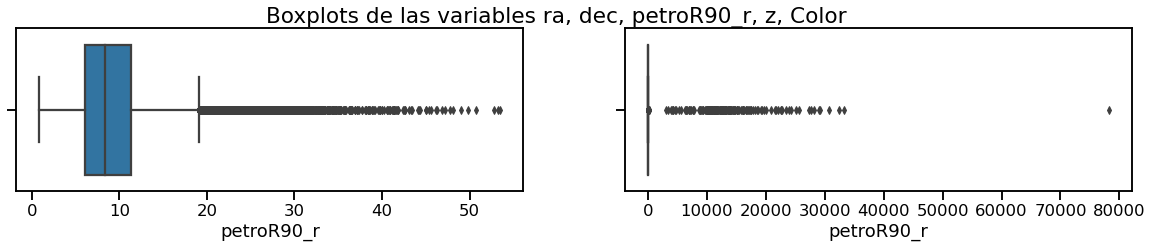

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(20,3))
seaborn.boxplot(x=data[data.petroR90_r < data.petroR90_r.mean()].petroR90_r, ax=ax[0])
seaborn.boxplot(x=data.petroR90_r, ax=ax[1])
plt.suptitle("Boxplots de las variables ra, dec, petroR90_r, z, Color")
plt.show()

In [31]:
data.notnull().all().to_frame()

,0
ra,True
dec,True
modelMag_u,True
modelMag_g,True
modelMag_r,True
modelMag_i,True
modelMag_z,True
petroR90_r,True
z,True
Color,True


No existen valores nulos

No se observan variables nan

### Elimine los outliers de cada Feature, indique el porcentaje de valores que se están eliminando

Remoción de outliers de las variables relacionadas a la fracción de luz

In [32]:
iqr_factor = 2.5
df_main_inliers, df_main_outliers = remove_outlier(data, "modelMag_u", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "modelMag_g", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "modelMag_r", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "modelMag_i", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "modelMag_z", iqr_factor)
len(df_main_inliers) / len(data) * 100

95.35722334910976

Después de remover los outlier, la cantidad de datos obtenidos representa un 95%

In [33]:
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "ra", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "dec", iqr_factor)
#df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "petroR90_r", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "z", iqr_factor)
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "Color", iqr_factor)
len(df_main_inliers) / len(data) * 100

95.24973561484717

Después de remover los outliers, la cantidad de datos sigue representando un 95%

In [34]:
df_main_inliers, df_main_outliers = remove_outlier(df_main_inliers, "petroR90_r", iqr_factor)
len(df_main_inliers) / len(data) * 100

93.62181654270904

Luego de remover los outliers, el porcentaje en relación al dataframe original es elevado, un 93%. Se elimina un 7% del total de datos

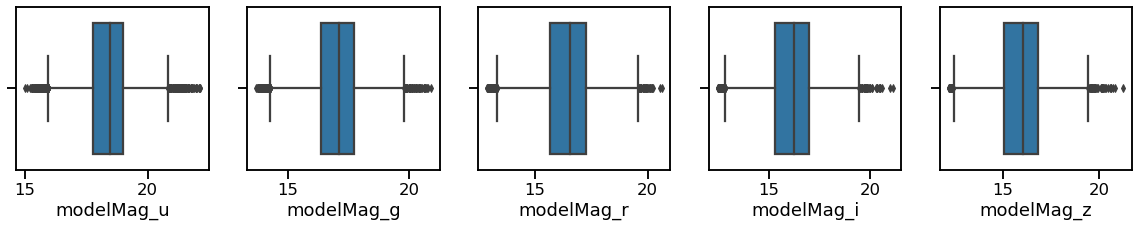

In [35]:
fig, ax = plt.subplots(ncols=5, figsize=(20,3))
seaborn.boxplot(x=df_main_inliers['modelMag_u'], ax=ax[0])
seaborn.boxplot(x=df_main_inliers['modelMag_g'], ax=ax[1])
seaborn.boxplot(x=df_main_inliers['modelMag_r'], ax=ax[2])
seaborn.boxplot(x=df_main_inliers['modelMag_i'], ax=ax[3])
seaborn.boxplot(x=df_main_inliers['modelMag_z'], ax=ax[4])
plt.show()

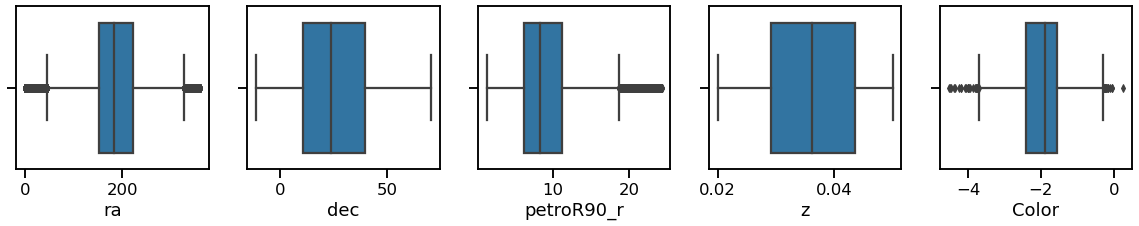

In [36]:
fig, ax = plt.subplots(ncols=5, figsize=(20,3))
seaborn.boxplot(x=df_main_inliers['ra'], ax=ax[0])
seaborn.boxplot(x=df_main_inliers['dec'], ax=ax[1])
seaborn.boxplot(x=df_main_inliers['petroR90_r'], ax=ax[2])
seaborn.boxplot(x=df_main_inliers['z'], ax=ax[3])
seaborn.boxplot(x=df_main_inliers['Color'], ax=ax[4])
plt.show()

In [37]:
cols_with_zero = df_main_inliers[df_main_inliers == 0].count(axis=0)
cols_with_zero[cols_with_zero > 0]

elliptical    50078
spiral        35638
uncertain     22288
dtype: int64

Las varibales de categoría de tipo de galaxia cuentan con ceros. Es lógico ya que son utilizadas para categorizar mediante valor booleano (0 o 1)

In [38]:
col_num = df_main_inliers.select_dtypes(['float']).columns

Distribución de las variables numéricas

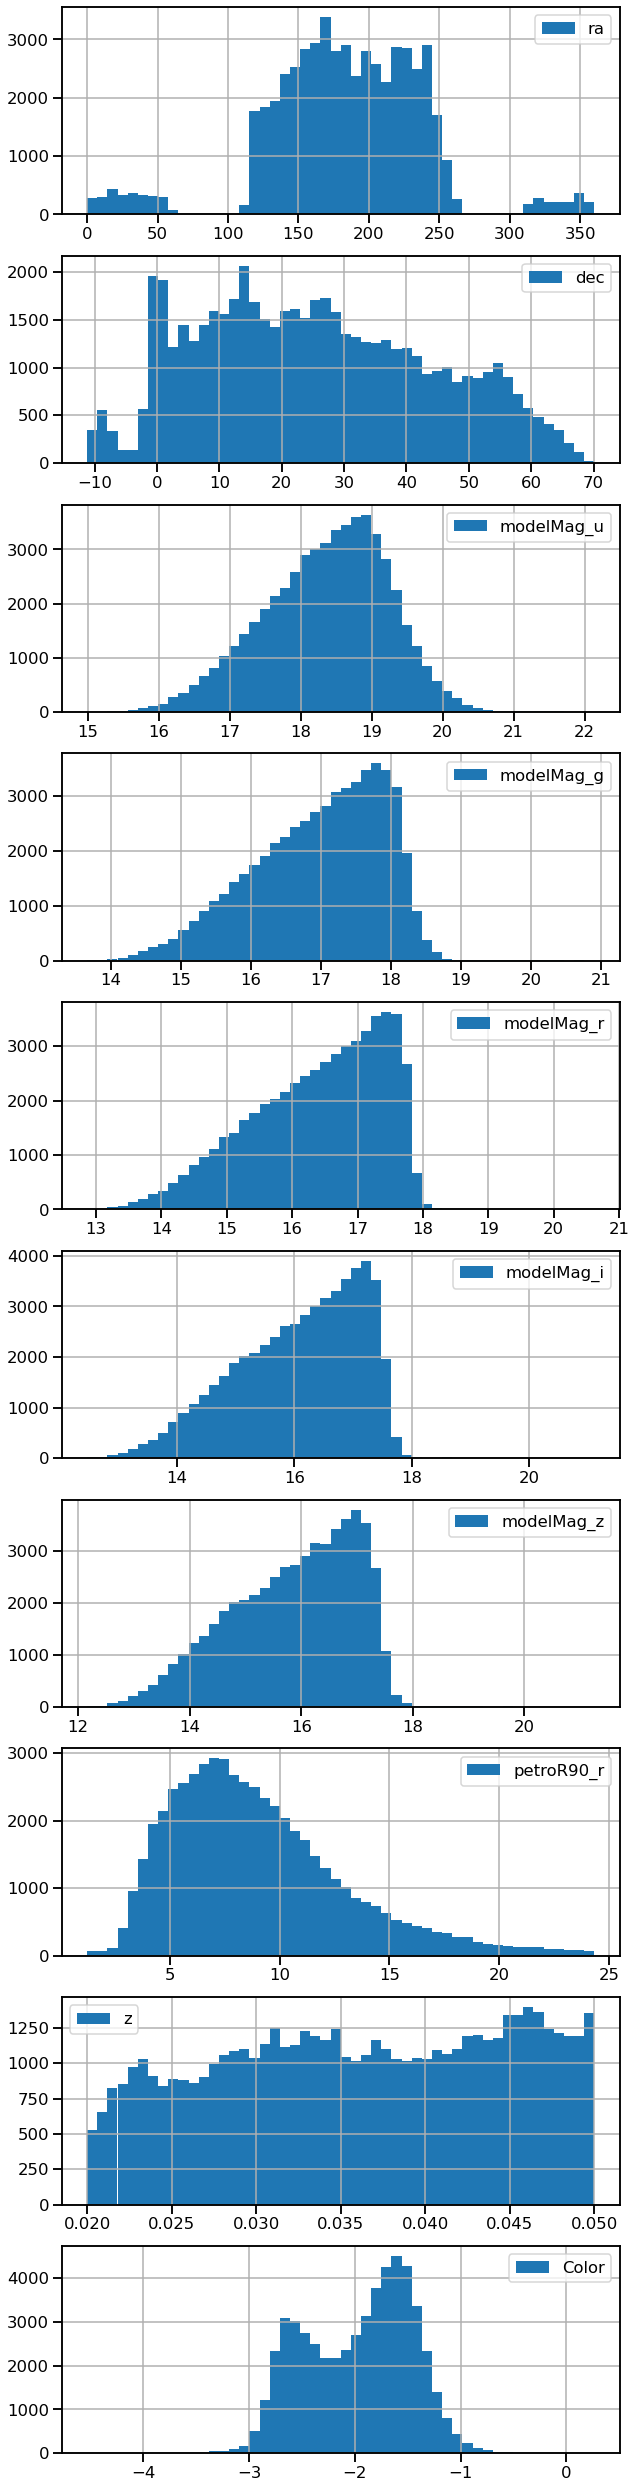

In [39]:
fig, axs = plt.subplots(len(col_num), figsize=(10, 45))
for n, col in enumerate(col_num):
    df_main_inliers[col].hist(ax=axs[n],bins=50, label=col)
    axs[n].legend()

A partir de los histogramas podemos observar que las varibles relacionadas a la fracción de luz tienden a una distribuciób normal, excepto las variables modelMag_z y modelMag_i.

La variable petroR900_r tiende a una distribución normal con una cola hacia la derecha.

La variable color tiende a una distribución chi cuadrado.

In [40]:
missing_values_count = df_main_inliers.isna().sum()
missing_values_count

ra              0
dec             0
modelMag_u      0
modelMag_g      0
modelMag_r      0
modelMag_i      0
modelMag_z      0
petroR90_r      0
z               0
Color           0
elliptical      0
spiral          0
uncertain       0
tipo_galaxia    0
dtype: int64

<AxesSubplot:>

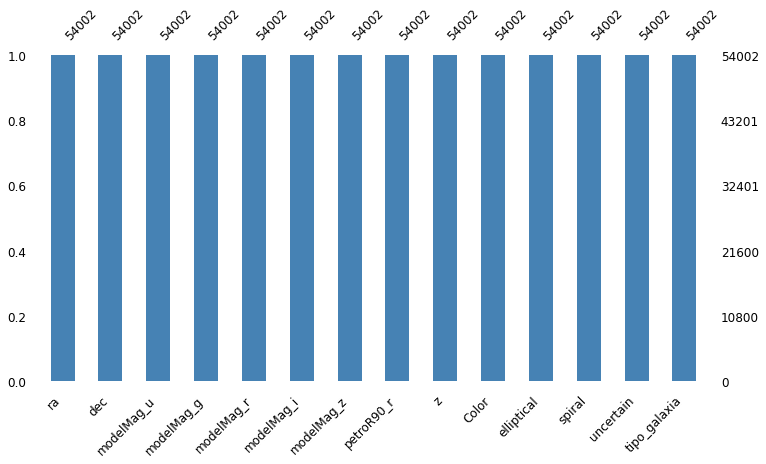

In [41]:
msno.bar(df_main_inliers,figsize=(12, 6), fontsize=12, color='steelblue')

<AxesSubplot:>

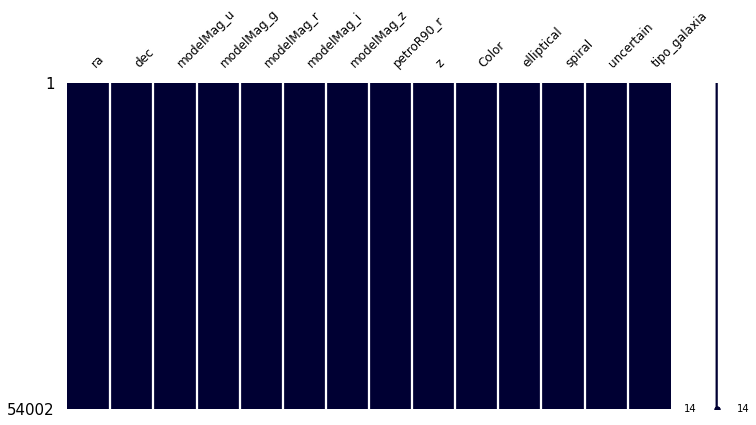

In [42]:
msno.matrix(df_main_inliers,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

No se observan valor a imputar

### Genere un nuevo DataFramen (df1).

In [43]:
df1 = df_main_inliers.copy()

In [44]:
df1

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,tipo_galaxia
objID,,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,spiral
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,uncertain
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,uncertain
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,uncertain
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,uncertain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0,elliptical
"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1,uncertain
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1,uncertain


### Cargar los valores de las imágenes correspondientes a las galaxias de df1.

Se toman las posciones angulares (ra, dec) de cada  galaxia y se descargan sus correspondientes imágenes en los filtros **g**, **r** y **z**. 

Todos los filtros para SDSS
**'Optical:SDSS**: ['SDSSg',
                  'SDSSi',
                  'SDSSr',
                  'SDSSu',
                  'SDSSz']

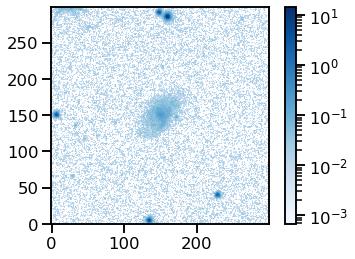

In [45]:
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm

# Ejemplo de una sola imagen
coords_gx = SkyCoord(df1.ra.iloc[2], df1.dec.iloc[2], unit=(u.deg, u.deg))
img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])

# Visualización de una de las galaxias.
img[0][0].data


plt.imshow(img[0][0].data, cmap='Blues', norm=LogNorm(), origin='lower')
plt.colorbar()

In [46]:
split = np.array_split(df1,10)

In [47]:
df_temp = df1.index.drop_duplicates(keep='first')

In [48]:
df1

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,tipo_galaxia
objID,,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,spiral
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,uncertain
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,uncertain
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,uncertain
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,uncertain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0,elliptical
"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1,uncertain
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1,uncertain


In [49]:
images = {}
initial = 0
for index, row in df1.iterrows():
    if (initial < 1):
        coords_gx = SkyCoord(row.ra, row.dec, unit=(u.deg, u.deg))
        img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])
        print(index)
        images[index] = img
        initial += 1
        print(f">>> successfull downloading image {initial}")
print("finish")

1,23765119242489E+018
>>> successfull downloading image 1
finish


In [50]:
images[df1.index[0]][0]

In [51]:
#images = []
#initial = 0
#total = len(df1)

#for index, row in df_tmp[['ra','dec']].iterrows():
#    if (initial < total):
#       coords_gx = SkyCoord(row.ra, row.dec, unit=(u.deg, u.deg))
#       img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])
#       images.append(img)
#       initial += 1
#       print(f">>> successfull downloading image {initial}")
#   else:
#       print(f"Finish downloading from {initial} to {total} images")
#       print("wait 5 seconds")
#      time.sleep(5)
#        total += 10

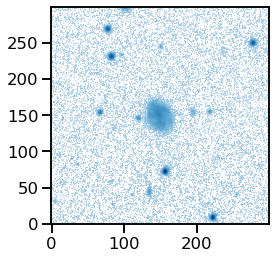

In [52]:
# por cada filtro survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'] obtiene un array de 300
plt.imshow(images[df1.index[0]][0][0].data, cmap='Blues', norm=LogNorm(), origin='lower')

In [53]:
image_size = images[df1.index[0]][0][0].data.shape
print(f'Tamaño de cada imagen: {image_size} pixeles')

Tamaño de cada imagen: (300, 300) pixeles


In [54]:
filters = len(images[df1.index[0]])
print (f'Cantidad de filtros: {filters}')

Cantidad de filtros: 5


In [55]:
display(images[df1.index[0]][0][0].data)

array([[-0.00769806, -0.04095459,  0.00227356, ..., -0.02786255,
         0.00872803,  0.04199219],
       [ 0.01225281,  0.01225281,  0.03552246, ...,  0.01870728,
         0.00872803,  0.01205444],
       [-0.00769806, -0.01101685, -0.02432251, ..., -0.02120972,
        -0.02120972, -0.0178833 ],
       ...,
       [ 0.015625  ,  0.03393555, -0.00269699, ..., -0.03930664,
        -0.0246582 , -0.0246582 ],
       [ 0.01928711, -0.01368713, -0.01368713, ..., -0.02832031,
         0.00834656, -0.00265884],
       [-0.00269699,  0.01196289, -0.0173645 , ..., -0.00265884,
        -0.02832031,  0.03033447]], dtype=float32)

Muestre:

    - Qué tamaños tienen las imágenes. 
    - Cuántas bandas/filtros tiene cada imagen.
    
Genere un dataframe (df2) en donde cada fila es una imagen y las columnas son los valores de cada px por filtro, por lo tanto, si las imagenes tienen un tamaño (Xpx, Ypx) y cunta con f filtros, entonces la cantidad de columnas de df2 son Xpx\*Ypx\*f. 

In [56]:
df2 = pd.DataFrame({})

In [57]:
survey = ['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz']

In [58]:
images_backup = images.copy()
images_backup

{'1,23765119242489E+018': [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f23d2ef03a0>],
  [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f23d530c910>]]}

In [60]:
survey = ['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz']
row_list = []
count_image = 0
# recorre cada imagen
for index in images_backup:
    # contador para identificar filtro
    count_filter = 0
    # fila_imagen
    row = {}
    
    # recorro cada filtro
    for filtro in images_backup[index]:
        x_values = filtro[0].data[0]
        y_values = filtro[0].data[1]
        # recorro arrays de x, y
        for i in range(len(filtro[0].data)):
            filter_name = survey[count_filter] # filtro actual
            current = i + 1 # valor actual
            for j in range(len(filtro[0].data)):
                current_j = j + 1
                col_y_name = "x_{current}_y_{current_j}_f_{filter_name}".format(current = current, current_j=current_j,filter_name=filter_name) # columna_y y_1_f_SDSSg
                y_value = y_values[i]  
                row[col_y_name] = y_value
        row['id'] = index
        count_filter += 1
    row_list.append(row)
    count_image += 1
    print(f"finish image #{count_image}")
    df2 = pd.DataFrame(row_list) 
    
print("finish generate df2")
df2.set_index('id',inplace=True)
df2.head()

finish image #1
finish generate df2


,x_1_y_1_f_SDSSg,x_1_y_2_f_SDSSg,x_1_y_3_f_SDSSg,x_1_y_4_f_SDSSg,x_1_y_5_f_SDSSg,x_1_y_6_f_SDSSg,x_1_y_7_f_SDSSg,x_1_y_8_f_SDSSg,x_1_y_9_f_SDSSg,x_1_y_10_f_SDSSg,...,x_300_y_291_f_SDSSz,x_300_y_292_f_SDSSz,x_300_y_293_f_SDSSz,x_300_y_294_f_SDSSz,x_300_y_295_f_SDSSz,x_300_y_296_f_SDSSz,x_300_y_297_f_SDSSz,x_300_y_298_f_SDSSz,x_300_y_299_f_SDSSz,x_300_y_300_f_SDSSz
id,,,,,,,,,,,,,,,,,,,,,
"1,23765119242489E+018",0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,...,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962


Tome una sola fila de df2 y muestre a partir de un gráfico la distribución de valores de los px en cada filtro en un rango de pxs.

In [61]:
df_g = df2.loc[: , df2.columns.str.endswith("g")]
df_i = df2.loc[: , df2.columns.str.endswith("i")]
df_u = df2.loc[: , df2.columns.str.endswith("u")]
df_r = df2.loc[: , df2.columns.str.endswith("r")]
df_z = df2.loc[: , df2.columns.str.endswith("z")]         
df_g

,x_1_y_1_f_SDSSg,x_1_y_2_f_SDSSg,x_1_y_3_f_SDSSg,x_1_y_4_f_SDSSg,x_1_y_5_f_SDSSg,x_1_y_6_f_SDSSg,x_1_y_7_f_SDSSg,x_1_y_8_f_SDSSg,x_1_y_9_f_SDSSg,x_1_y_10_f_SDSSg,...,x_300_y_291_f_SDSSg,x_300_y_292_f_SDSSg,x_300_y_293_f_SDSSg,x_300_y_294_f_SDSSg,x_300_y_295_f_SDSSg,x_300_y_296_f_SDSSg,x_300_y_297_f_SDSSg,x_300_y_298_f_SDSSg,x_300_y_299_f_SDSSg,x_300_y_300_f_SDSSg
id,,,,,,,,,,,,,,,,,,,,,
"1,23765119242489E+018",0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,0.012253,...,0.012054,0.012054,0.012054,0.012054,0.012054,0.012054,0.012054,0.012054,0.012054,0.012054


<AxesSubplot:xlabel='1,23765119242489E+018', ylabel='Count'>

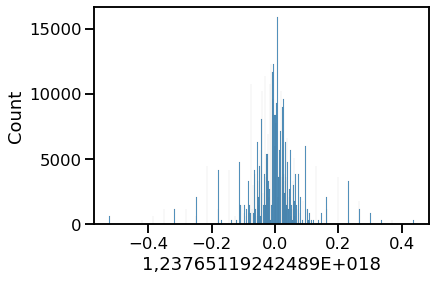

In [62]:
seaborn.histplot(data=df2.iloc[0])

<AxesSubplot:xlabel='1,23765119242489E+018'>

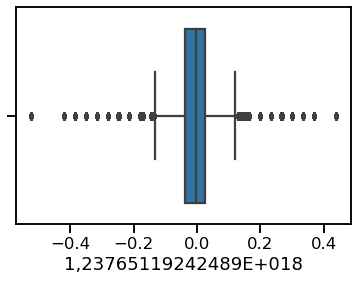

In [63]:
seaborn.boxplot(x=df2.iloc[0])

<span style="color:red">Falta gŕafico de distribución de valores de los px en cada filtro en un rango de pxs.</span>

Por ultimo una df1 y df2 y guarde como un .csv

In [64]:
result = pd.merge(df1, df2, how="right",left_index=True,right_index=True)
result.to_csv('galaxy_with_px.csv',index=False)

In [65]:
demo = pd.read_csv('galaxy_with_px.csv')
demo

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,...,x_300_y_291_f_SDSSz,x_300_y_292_f_SDSSz,x_300_y_293_f_SDSSz,x_300_y_294_f_SDSSz,x_300_y_295_f_SDSSz,x_300_y_296_f_SDSSz,x_300_y_297_f_SDSSz,x_300_y_298_f_SDSSz,x_300_y_299_f_SDSSz,x_300_y_300_f_SDSSz
0,116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,...,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962,-0.110962


# Componentes Principales 

Ajuste el modelo de CPA  al df1 con n=3 el número de componentes principales. Grafique.

In [66]:
from sklearn.preprocessing import MinMaxScaler

new_df1 = df1.drop(['tipo_galaxia'], axis=1)
# Scalling
scaler = MinMaxScaler()
new_df = pd.DataFrame(scaler.fit_transform(new_df1), columns = new_df1.columns)
new_df

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
0,0.323679,0.628123,0.388035,0.422660,0.448185,0.416475,0.411794,0.309874,0.717351,0.648141,0.0,1.0,0.0
1,0.323492,0.646994,0.438303,0.358607,0.326150,0.290167,0.273888,0.365343,0.673681,0.375909,0.0,0.0,1.0
2,0.322089,0.653112,0.501396,0.518560,0.535575,0.496362,0.500254,0.434733,0.146169,0.620548,0.0,0.0,1.0
3,0.322381,0.657641,0.893182,0.843443,0.862893,0.912903,0.739259,0.013099,0.637896,0.566071,0.0,0.0,1.0
4,0.325813,0.671750,0.587477,0.598136,0.599145,0.554972,0.542225,0.486430,0.753031,0.595081,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53997,0.642081,0.366766,0.465976,0.407295,0.379367,0.340634,0.324440,0.377464,0.308971,0.420730,1.0,0.0,0.0
53998,0.680982,0.749977,0.429038,0.467855,0.495738,0.467077,0.460708,0.336679,0.694151,0.663942,0.0,0.0,1.0
53999,0.680721,0.759258,0.652214,0.563224,0.516213,0.459223,0.432959,0.098610,0.953935,0.364519,0.0,0.0,1.0
54000,0.609253,0.904167,0.530276,0.559760,0.578678,0.541279,0.537069,0.162309,0.562806,0.647214,0.0,0.0,1.0


In [67]:
from sklearn.feature_extraction import DictVectorizer

feature_cols = new_df.columns.values
feature_dict = list(new_df[feature_cols].T.to_dict().values())

vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)


In [68]:
#evaluo la dimension final de la matriz para no generar un conflicto en la memoria
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = np.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 2.68 MB
Final size: 2.68


In [69]:
#se aplica algoritmo de analisis de componentes principales
scaled_dense_feature_matrix = dense_feature_matrix
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

(54002, 3)

In [70]:
pca.explained_variance_ratio_
#se busca reducir la dimensionalidad observando las componentes con mayor varianza

array([0.552534  , 0.14531791, 0.10563299], dtype=float32)

In [71]:
pca.explained_variance_ratio_.sum()

0.8034849

In [72]:
pca.n_components

3

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.552534   0.14531791 0.10563299]


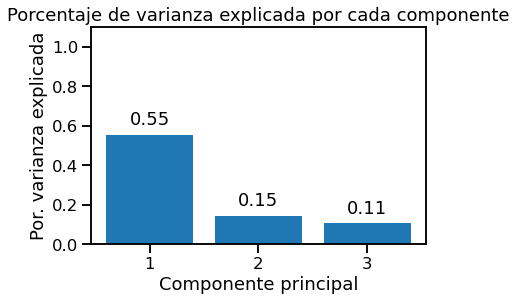

In [73]:
#Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df1.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [74]:
pcas = []
for i in range(1,4):
    pcas.append("Pca_" + str(i))
new_df1[pcas] = proyected_features[:,:3]

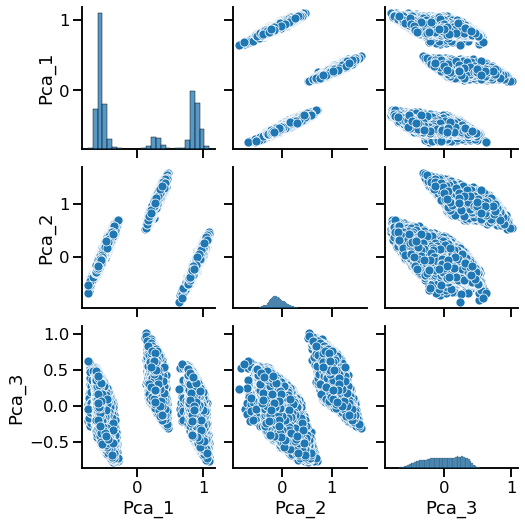

In [75]:
seaborn.pairplot(data=new_df1,
                x_vars=['Pca_1', 'Pca_2','Pca_3'],
                y_vars=['Pca_1', 'Pca_2','Pca_3'])
#se realizan graficos entre las componentes